In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
cur = []
p = []
with open("data.txt") as f:
    while True:
         line =f.readline()
         if not line:
              break
         data=list(map(float, line.split()))
         cur.append(data[0])
         p.append(data[1])

In [25]:
cur = np.array(cur)
p = np.array(p)

In [26]:
H = (1390*cur + 140)/(4*np.pi)

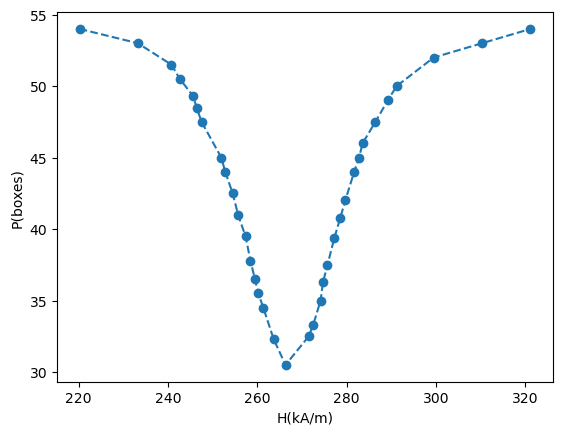

In [37]:
plt.plot(H, p,marker='o', label='data',ls='dashed')
plt.xlabel('H(kA/m)')
plt.ylabel('P(boxes)')
plt.show()

In [34]:
np.max(p)

54.0

In [57]:
def fit(x):
    return(55-25/(((x-267.5)/12)**2+1))

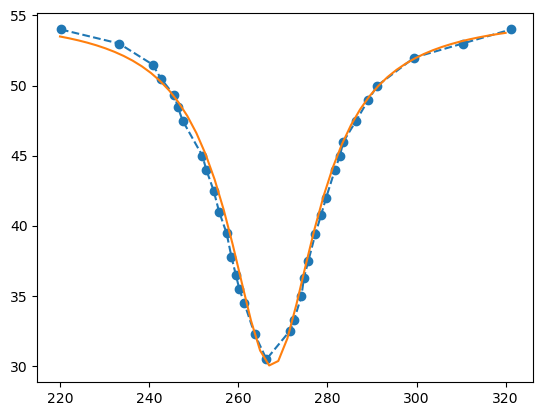

In [60]:
plt.plot(H, p,marker='o', label='data',ls='dashed')
h = np.linspace(220,320,50)
plt.plot(h,fit(h))

In [61]:
from scipy.optimize import curve_fit

In [62]:
def lorentzian(x, A, B, C, D):
    return A - B / (C * (x - D)**2 + 1)

initial_guess = [55, 25, 1/(12**2), 268]
# 执行拟合
params, covariance = curve_fit(lorentzian, H, p, p0=initial_guess)
A_fit, B_fit, C_fit, D_fit = params

# 输出结果
print(f"拟合参数: A={A_fit:.2f}, B={B_fit:.2f}, C={C_fit:.2f}, D={D_fit:.2f}")


拟合参数: A=55.96, B=25.89, C=0.01, D=267.33


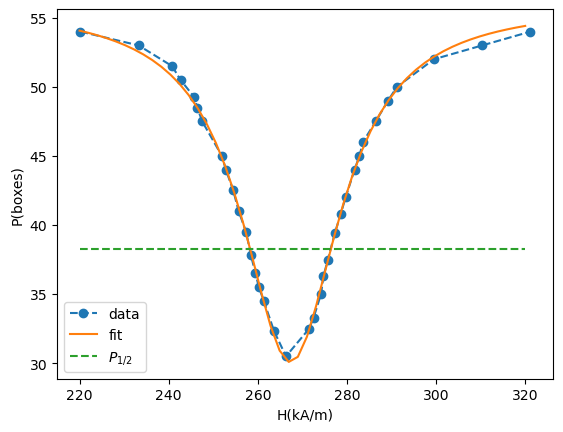

In [75]:
plt.plot(H, p,marker='o', label='data',ls='dashed')
h = np.linspace(220,320,50)
plt.plot(h, A_fit - B_fit / (C_fit * (h - D_fit)**2 + 1),label='fit')
plt.plot(h,h*0+38.3,ls='dashed',label='$P_{1/2}$')
plt.xlabel('H(kA/m)')
plt.ylabel('P(boxes)')
plt.legend()
plt.show()

In [73]:
A_fit - B_fit / (C_fit * (9)**2 + 1)

38.197395288899365

In [76]:
print(A_fit,B_fit,C_fit,D_fit)

55.964750896452 25.894894347057324 0.005647434916858221 267.33355391185273
